# Complete Flight Passenger Analysis using Python		

# Aim:

There is a lot of flights going to and fro now-a-days. As a data analyst you have been hired to assist companies, increasing their sales and business.
You have been shared with customer satisfactions survey on various parameters. Identify the Key important parameters that can bring in more customers and have a positive impact on their journey.



# Data Information:
passenger data:                                                                                                                 
   Attributes:
   Name                     Description                                           Gender :          Gender of the passengers (Female, Male)                                                                                                                 
  Customer Type:    The customer type (Loyal customer, disloyal customer)
  Age:              The actual age of the passengers                                                                           
  Type of Travel:   Purpose of the flight of the passengers (Personal Travel,                       Business Travel)           
  Class:            Travel class in the plane of the passengers (Business, Eco,                     Eco Plus)                  
  Flight distance:  The flight distance of this journey

survery data                                                                                                                   
    Attributes:                                                                                                                
   Name                           Description                                                            Inflight wifi service :  Satisfaction level of the inflight wifi service (0 Not Applicable ; 1-5)                                                    
   Departure/Arrival:        Satisfaction level of Departure/Arrival time convenient                                           
   Ease of Online booking:  Satisfaction level of online booking                                                               
   Gate location:           Satisfaction level of Gate location                                                                
   Food and drink:          Satisfaction level of Food and drink                                                               
   Online boarding:         Satisfaction level of online boarding                                                              
   Seat comfort:            Satisfaction level of Seat comfort                                                                 
   Inflight entertainment:  Satisfaction level of inflight entertainment                                                       
   On-board service :       Satisfaction level of On-board service                                                             
   Leg room service:        Satisfaction level of Leg room service                                                             
   Baggage handling:        Satisfaction level of baggage handling                                                             
   Check-in service:        Satisfaction level of Check-in service                                                             
   Inflight service:        Satisfaction level of inflight service                                                             
   Cleanliness:             Satisfaction level of Cleanliness                                                                  
   Departure Delay :        Minutes delayed when departure                                                                     
   in Minutes                                                                                                                  
   Arrival Delay in Minutes:Minutes delayed when Arrival                                                                       
   Satisfaction:            Airline satisfaction level(Satisfaction, neutral or dissatisfaction)                               

In [109]:
#import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

importing dataset

In [3]:
#passenger_data

In [4]:
passenger_data = pd.read_csv(r"D:\akash\bi_flight_analysis\passenger_data.csv")
passenger_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,114960,Female,Loyal Customer,55,Business travel,Business,2001
1,43337,Male,Loyal Customer,36,Business travel,Eco,387
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072
4,70039,Male,Loyal Customer,39,Business travel,Eco,183


In [5]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122454 entries, 0 to 122453
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               122454 non-null  int64 
 1   Gender           122454 non-null  object
 2   Customer Type    122454 non-null  object
 3   Age              122454 non-null  int64 
 4   Type of Travel   122454 non-null  object
 5   Class            122454 non-null  object
 6   Flight Distance  122454 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.5+ MB


In [6]:
passenger_data["Flight Distance"].value_counts()

337     701
594     512
404     483
862     475
192     429
       ... 
681       1
1293      1
1292      1
1457      1
155       1
Name: Flight Distance, Length: 3807, dtype: int64

In [7]:
passenger_data.dropna(inplace = True)

In [8]:
passenger_data.isnull().sum()

id                 0
Gender             0
Customer Type      0
Age                0
Type of Travel     0
Class              0
Flight Distance    0
dtype: int64

In [9]:
#survey_data

In [10]:
survery_data = pd.read_csv(r"D:\akash\bi_flight_analysis\survery_data.csv")
survery_data.head()

,id,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
survery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Inflight wifi service              129880 non-null  int64  
 2   Departure/Arrival time convenient  129880 non-null  int64  
 3   Ease of Online booking             129880 non-null  int64  
 4   Gate location                      129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Online boarding                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   On-board service                   129880 non-null  int64  
 10  Leg room service                   129880 non-null  int64  
 11  Baggage handling                   1298

In [12]:
survery_data.dropna(inplace=True)

In [13]:
survery_data.isnull().sum()

id                                   0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
duplicates = survery_data.duplicated().sum() 
if  duplicates == 0:
    print("there is no duplicted rows in this data")
else:
    print('there are: ', str(duplicates), " duplicates")

there is no duplicted rows in this data


In [15]:
duplicates = passenger_data.duplicated().sum() 
if  duplicates == 0:
    print("there is no duplicted rows in this data")
else:
    print('there are: ', str(duplicates), " duplicates")

there are:  1454  duplicates


In [16]:
display(passenger_data.drop_duplicates())


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,114960,Female,Loyal Customer,55,Business travel,Business,2001
1,43337,Male,Loyal Customer,36,Business travel,Eco,387
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072
4,70039,Male,Loyal Customer,39,Business travel,Eco,183
...,...,...,...,...,...,...,...
120995,2944,Female,Loyal Customer,49,Business travel,Business,1813
120996,10732,Male,Loyal Customer,33,Business travel,Eco,158
120997,22247,Male,Loyal Customer,63,Business travel,Business,143
120998,102432,Female,Loyal Customer,28,Personal Travel,Eco,223


In [17]:
#join both dataset

In [18]:
df = passenger_data.join(survery_data.set_index('id'), on='id', how='left')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,114960,Female,Loyal Customer,55,Business travel,Business,2001,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,24.0,21.0,satisfied
1,43337,Male,Loyal Customer,36,Business travel,Eco,387,3.0,5.0,2.0,...,3.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,neutral or dissatisfied
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235,3.0,4.0,3.0,...,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,0.0,neutral or dissatisfied
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072,3.0,2.0,4.0,...,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,0.0,neutral or dissatisfied
4,70039,Male,Loyal Customer,39,Business travel,Eco,183,4.0,3.0,3.0,...,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122449,3154,Male,Loyal Customer,63,Personal Travel,Eco,140,5.0,3.0,5.0,...,5.0,4.0,5.0,2.0,2.0,5.0,5.0,0.0,0.0,satisfied
122450,72489,Male,Loyal Customer,39,Business travel,Business,1704,3.0,4.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,neutral or dissatisfied
122451,104903,Male,Loyal Customer,23,Business travel,Business,1565,1.0,3.0,3.0,...,1.0,3.0,3.0,4.0,4.0,3.0,1.0,21.0,28.0,neutral or dissatisfied
122452,112585,Female,Loyal Customer,15,Business travel,Business,602,3.0,3.0,3.0,...,5.0,5.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,satisfied


In [19]:
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("there is no duplicted rows in this data")
else:
    print('there are: ', str(duplicates), " duplicates")

there are:  1454  duplicates


In [20]:
display(df.drop_duplicates())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,114960,Female,Loyal Customer,55,Business travel,Business,2001,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,24.0,21.0,satisfied
1,43337,Male,Loyal Customer,36,Business travel,Eco,387,3.0,5.0,2.0,...,3.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,neutral or dissatisfied
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235,3.0,4.0,3.0,...,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,0.0,neutral or dissatisfied
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072,3.0,2.0,4.0,...,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,0.0,neutral or dissatisfied
4,70039,Male,Loyal Customer,39,Business travel,Eco,183,4.0,3.0,3.0,...,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120995,2944,Female,Loyal Customer,49,Business travel,Business,1813,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0.0,0.0,satisfied
120996,10732,Male,Loyal Customer,33,Business travel,Eco,158,2.0,4.0,4.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,92.0,84.0,neutral or dissatisfied
120997,22247,Male,Loyal Customer,63,Business travel,Business,143,1.0,1.0,1.0,...,5.0,5.0,5.0,4.0,5.0,5.0,3.0,0.0,27.0,satisfied
120998,102432,Female,Loyal Customer,28,Personal Travel,Eco,223,4.0,4.0,4.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,neutral or dissatisfied


From the tabel above we can see that in Flight Distance, Departure/Arrival Delay in Minutes: max value far from Q3 which mean we could find outliers in this columns

In [22]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                369
Departure/Arrival time convenient    369
Ease of Online booking               369
Gate location                        369
Food and drink                       369
Online boarding                      369
Seat comfort                         369
Inflight entertainment               369
On-board service                     369
Leg room service                     369
Baggage handling                     369
Checkin service                      369
Inflight service                     369
Cleanliness                          369
Departure Delay in Minutes           369
Arrival Delay in Minutes             369
satisfaction                         369
dtype: int64

In [23]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122085 entries, 0 to 122453
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 122085 non-null  int64  
 1   Gender                             122085 non-null  object 
 2   Customer Type                      122085 non-null  object 
 3   Age                                122085 non-null  int64  
 4   Type of Travel                     122085 non-null  object 
 5   Class                              122085 non-null  object 
 6   Flight Distance                    122085 non-null  int64  
 7   Inflight wifi service              122085 non-null  float64
 8   Departure/Arrival time convenient  122085 non-null  float64
 9   Ease of Online booking             122085 non-null  float64
 10  Gate location                      122085 non-null  float64
 11  Food and drink                     1220

In [24]:
#Replace the Column values in “Satisfaction” column with Logic;
df['satisfaction'].replace({'neutral or dissatisfied': 'no', 'satisfied': 'yes'},inplace = True)

In [25]:
df.set_index('id')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
114960,Female,Loyal Customer,55,Business travel,Business,2001,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,24.0,21.0,yes
43337,Male,Loyal Customer,36,Business travel,Eco,387,3.0,5.0,2.0,5.0,...,3.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,no
74692,Female,Loyal Customer,17,Personal Travel,Eco,1235,3.0,4.0,3.0,4.0,...,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,0.0,no
98299,Female,Loyal Customer,11,Personal Travel,Eco,1072,3.0,2.0,4.0,3.0,...,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,0.0,no
70039,Male,Loyal Customer,39,Business travel,Eco,183,4.0,3.0,3.0,3.0,...,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,Male,Loyal Customer,63,Personal Travel,Eco,140,5.0,3.0,5.0,4.0,...,5.0,4.0,5.0,2.0,2.0,5.0,5.0,0.0,0.0,yes
72489,Male,Loyal Customer,39,Business travel,Business,1704,3.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,no
104903,Male,Loyal Customer,23,Business travel,Business,1565,1.0,3.0,3.0,3.0,...,1.0,3.0,3.0,4.0,4.0,3.0,1.0,21.0,28.0,no


In [26]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,114960,Female,Loyal Customer,55,Business travel,Business,2001,2.0,2.0,2.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,24.0,21.0,yes
1,43337,Male,Loyal Customer,36,Business travel,Eco,387,3.0,5.0,2.0,...,3.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,no
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235,3.0,4.0,3.0,...,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,0.0,no
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072,3.0,2.0,4.0,...,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,0.0,no
4,70039,Male,Loyal Customer,39,Business travel,Eco,183,4.0,3.0,3.0,...,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,0.0,yes


In [27]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000,122085.000000
mean,60524.249081,39.404440,1179.330770,2.731449,3.059377,2.755793,2.976721,3.205062,3.247328,3.437122,3.358766,3.378425,3.347119,3.625556,3.298882,3.637195,3.285686,15.062743,15.445804
std,34928.093036,15.115251,995.683556,1.329769,1.526527,1.402556,1.278346,1.330606,1.350458,1.319179,1.334229,1.288993,1.318133,1.182943,1.269658,1.179360,1.315016,38.591414,39.103561
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30275.000000,27.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,60555.000000,40.000000,837.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,90771.000000,51.000000,1713.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,121000.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


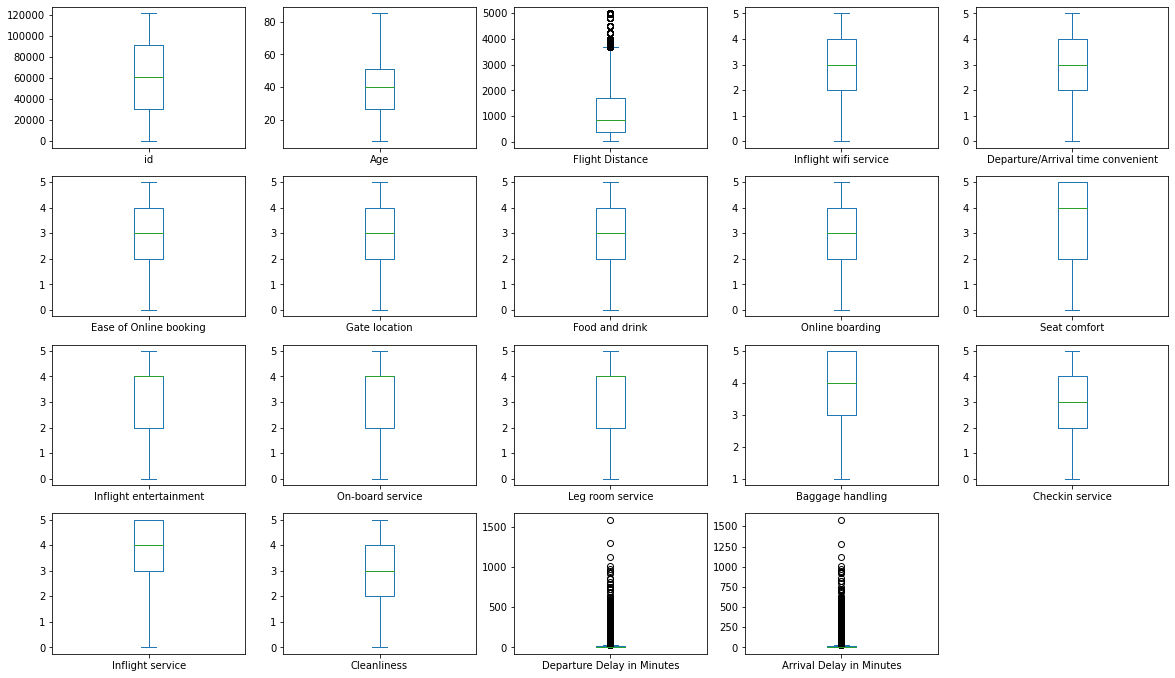

In [28]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

In [29]:
# as expected only the three columns(Flight Distance, Departure/Arrival Delay in Minutes) has outliers we need to remove it

# remove outliers

In [30]:
#statical information about columns with outliers 
df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,122085.0,1179.330770,995.683556,31.0,409.0,837.0,1713.0,4983.0
Departure Delay in Minutes,122085.0,15.062743,38.591414,0.0,0.0,0.0,13.0,1592.0
Arrival Delay in Minutes,122085.0,15.445804,39.103561,0.0,0.0,0.0,13.0,1584.0


<AxesSubplot:xlabel='Flight Distance'>

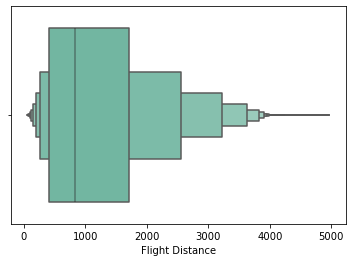

In [31]:
sns.boxenplot(x =df['Flight Distance'], palette = 'Set2')


In [32]:
df.loc[df['Flight Distance'] > 3736.5].shape 
#get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2730, 24)

In [33]:
outliers_distance = df[df['Flight Distance'] > 3736.5]
df.drop(outliers_distance.index, inplace = True)

<AxesSubplot:xlabel='Departure Delay in Minutes'>

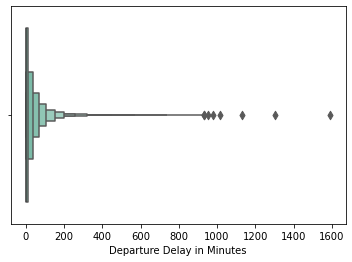

In [34]:
#outliers in departure delay in minutes
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

In [35]:
df.loc[df['Departure Delay in Minutes'] > 800].shape


(11, 24)

In [36]:
outliers_departure = df[df['Departure Delay in Minutes'] > 800]
df.drop(outliers_departure.index, inplace = True)

<AxesSubplot:xlabel='Departure Delay in Minutes'>

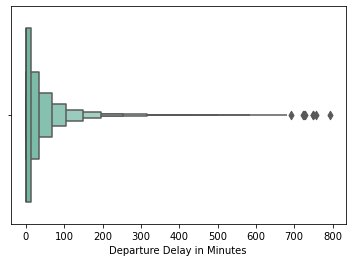

In [37]:
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

In [38]:
df.loc[df['Arrival Delay in Minutes'] > 650].shape

(8, 24)

In [39]:
outlier_arrival = df[df['Arrival Delay in Minutes'] > 650]
df.drop(outlier_arrival.index, inplace = True)

In [40]:
#rename columns

In [41]:
df.rename(columns = lambda x:x.strip().lower().replace(" ", "_"), inplace = True)

In [42]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [45]:
#visualize data, analysis data
#visualize the target

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119336 entries, 0 to 122453
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 119336 non-null  int64  
 1   gender                             119336 non-null  object 
 2   customer_type                      119336 non-null  object 
 3   age                                119336 non-null  int64  
 4   type_of_travel                     119336 non-null  object 
 5   class                              119336 non-null  object 
 6   flight_distance                    119336 non-null  int64  
 7   inflight_wifi_service              119336 non-null  float64
 8   departure/arrival_time_convenient  119336 non-null  float64
 9   ease_of_online_booking             119336 non-null  float64
 10  gate_location                      119336 non-null  float64
 11  food_and_drink                     1193

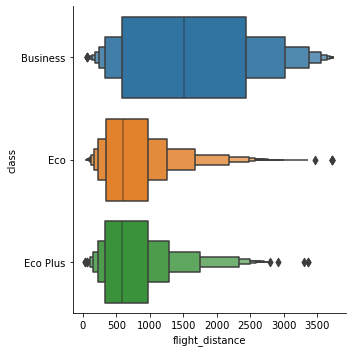

In [47]:
sns.catplot(x="flight_distance", y="class",data= df,kind = "boxen")

In [48]:
#df[df['satisfaction'] == 5 |df['gender'] == 'female'| df['customer_type'] == 'Loyal Customer']['ease_of_online_booking'].value_counts()

In [49]:
df[df['flight_distance'] == 101]['class'].value_counts()

Eco         272
Business     74
Eco Plus     47
Name: class, dtype: int64

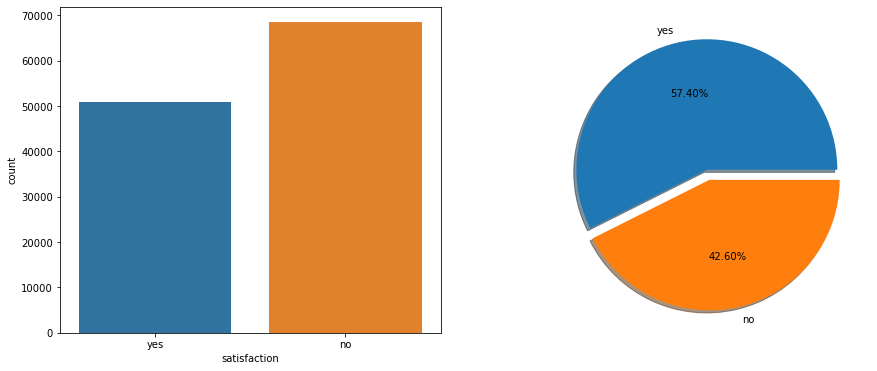

In [50]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['satisfaction'], data = df)

plt.subplot(1, 2, 2)
label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
plt.pie(x= df['satisfaction'].value_counts(), labels = label, explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()


from the plots abvoe we can see that more that half of the customers are unsatisfied, so we will try to know which features is affecting them the most

In [51]:
#representing data and check how the customer satisfied with it¶


In [52]:
def plot_data(column):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x = df[column], data = df)

    plt.subplot(1, 2, 2)
    label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
    sns.countplot(x = df[column], hue = 'satisfaction', data = df, )

    plt.show()

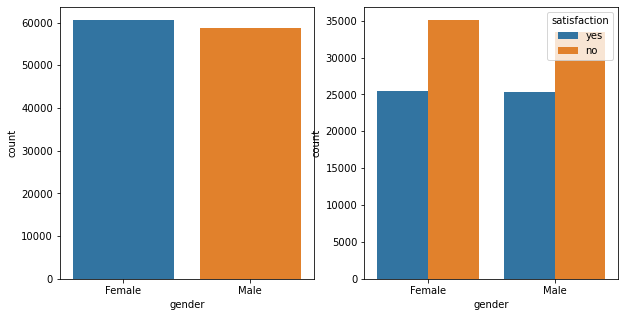

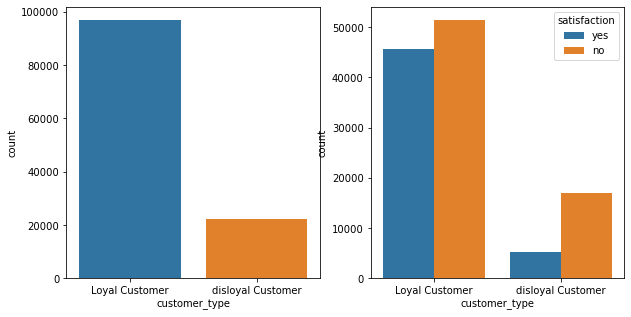

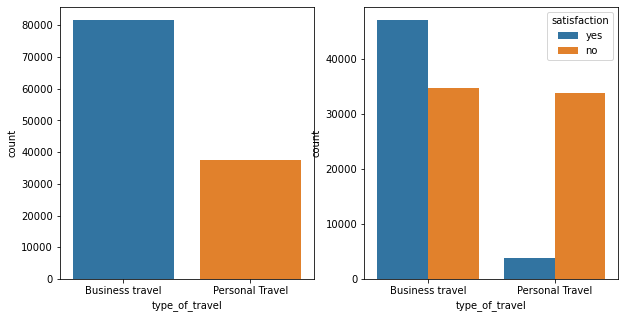

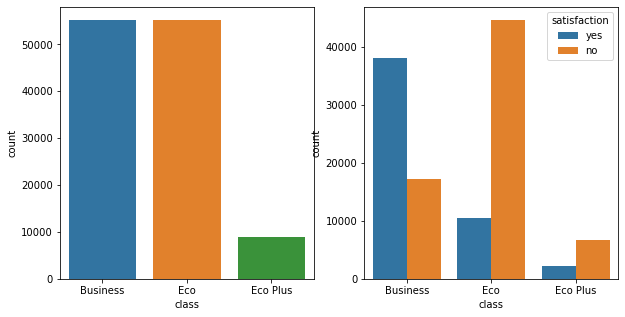

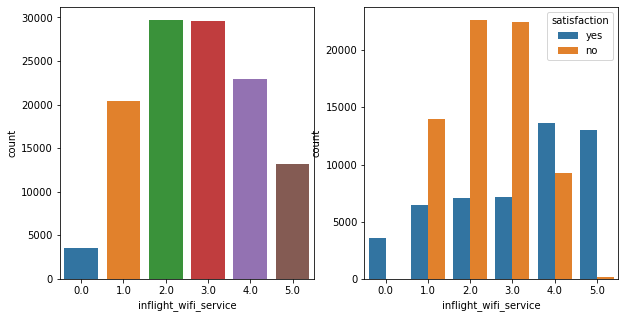

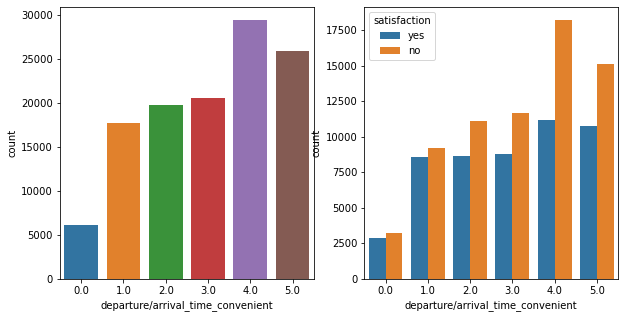

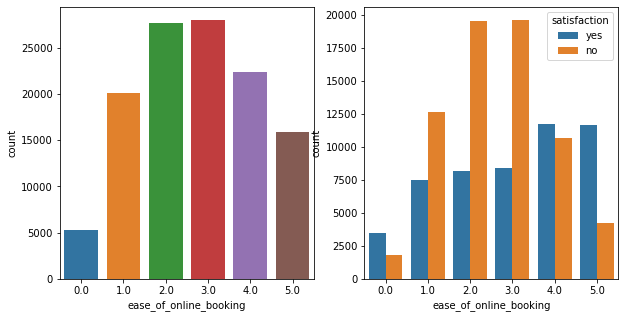

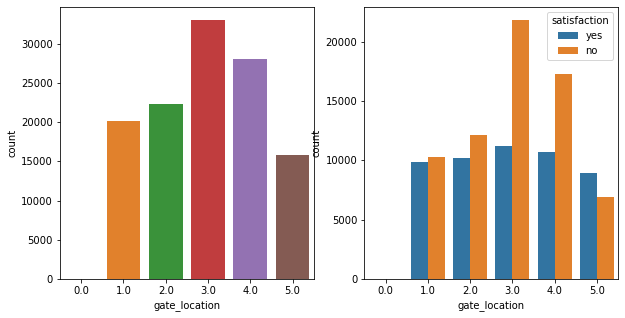

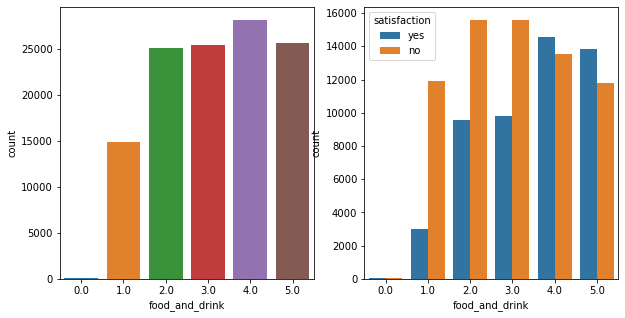

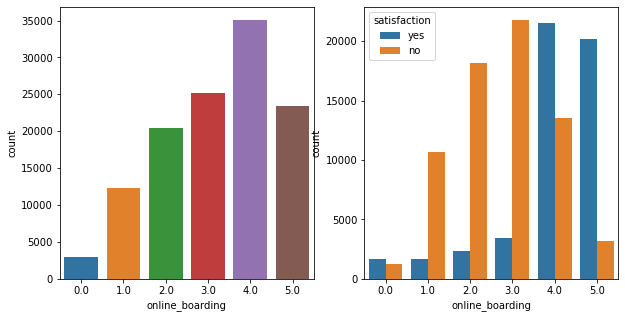

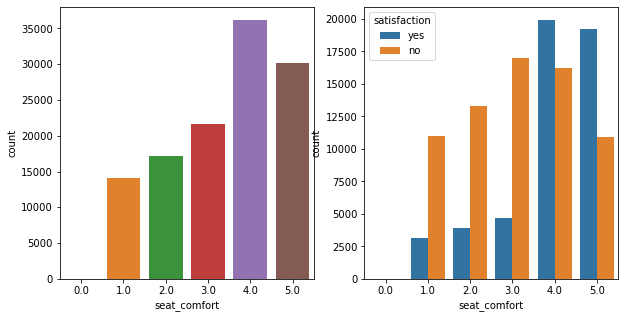

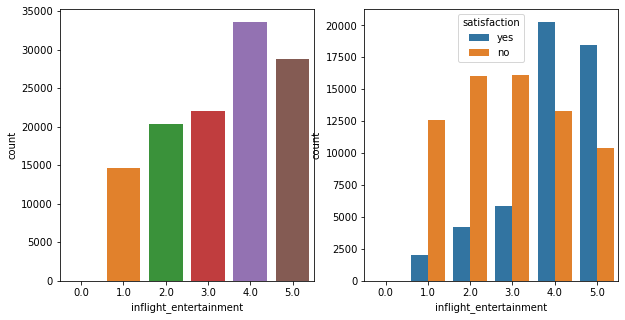

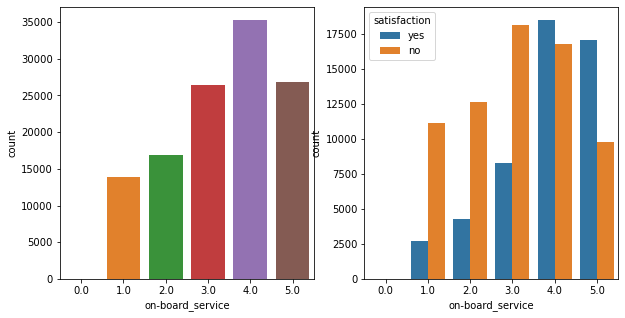

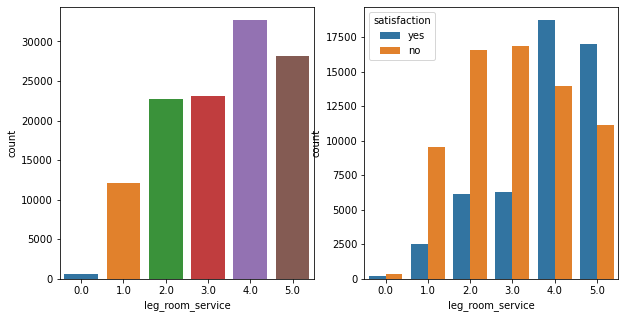

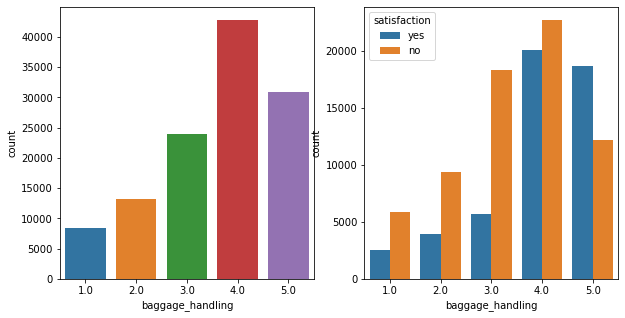

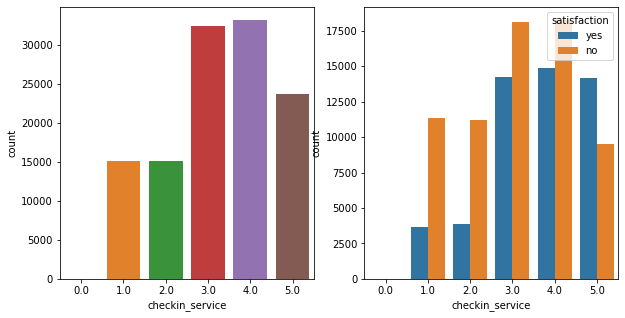

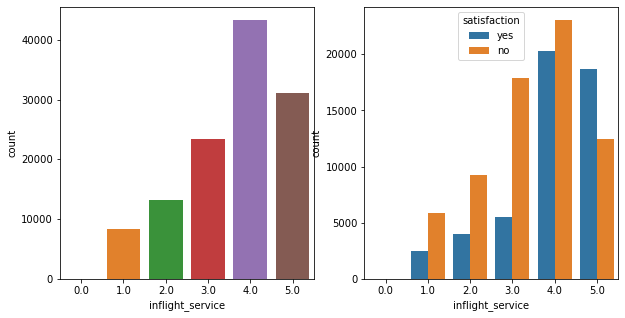

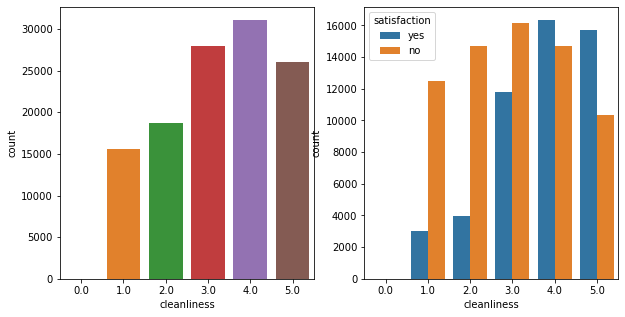

In [53]:
for i in df.columns:
    if len(df[i].unique())<= 6 and i != 'satisfaction':
        plot_data(i)

1. the count of male and female is almost same and for both genders majority of    them aren't satisfied
2. loyal customers are almost 5 times than disloyal customers and more than        half are dissatisfied whereas majority of the disloyal customers are            dissatisfied as well
3. for type of travel, the business travel category customers are twice as        personal travel and customers in business travel are majorly satisfied          whereas in personal travel almost 75% of customers are dissatisfied
4. for class of travel, business and eco class customers as almost same but eco    category are the least where more than half of the business class customers    are satisfied but majority of eco and eco plus customers are dissatisfied
5. for inflight wifi service most of the customersretd 2 and 3 so they are are    dissatisfied
6. for departure/arrival_time_convenient moat customers rated 4 and 5 but at      the same time they are dissatisfied which means there are other reasons for    dissatisfaction
7. the online booknig took 2-3 rates which means most of the people wasn't        sastisfied with it
8. 3 rates was the most rates for gate location so the poeple weren't satisfied    with it
9. food and drink get high rates but at the same time the most of the people      was dissatisfied which mean there are another reasons for their                dissatisfaction
10. online booking get high rate and most of the peopel was satisfied with it
11. most of rate for seat comfort was high and the majority of the customers       were satisfied
12. inflight entertainment get high reates and majority of the customers were       satifsied
13. on board service have high rates but half of the customers are satisfied       and the other half are not
14. leg space has high rates and most people satisfied with it
15. baggage handling despite it has high reate but many customers were not         satisfied which mean there are other reasons
16.  checkin service is high rated withdissatisfaction and the same for              inflight service
17. but for the cleanliness most rates are high but satisfaction is very low

# check affect of some features one by one

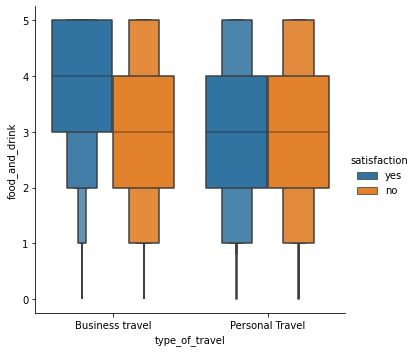

In [54]:
sns.catplot(x="type_of_travel", y="food_and_drink", hue="satisfaction",data= df,kind = "boxen")
plt.title = ("Effect of Food and drink on satisfaction in different types of travel")

In [55]:
#Most of Satisfied customers in the Business Travel type chose 4 and 5 rating.

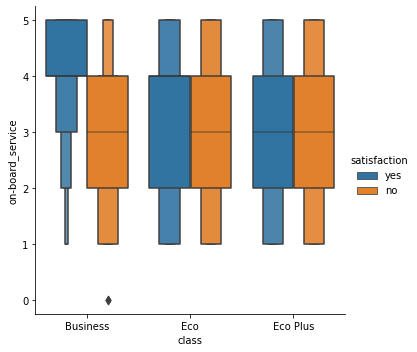

In [56]:
sns.catplot(x="class", y="on-board_service", hue="satisfaction",data= df,kind="boxen")
plt.title = ('Effect of on-board service on satisfaction in different classes')

On-board service nealy has no effect on the satisfaction for eco class passengers.

In the business class, the higher is the on-board service rating, the more satisfied the customers become.

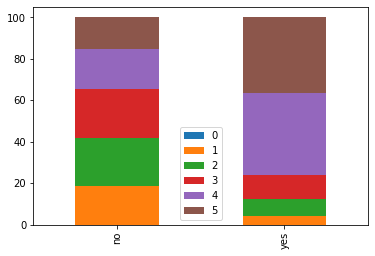

In [57]:
satis=df["satisfaction"]
num0=satis[df["inflight_entertainment"]==0].value_counts()
num1=satis[df["inflight_entertainment"]==1].value_counts()
num2=satis[df["inflight_entertainment"]==2].value_counts()
num3=satis[df["inflight_entertainment"]==3].value_counts()
num4=satis[df["inflight_entertainment"]==4].value_counts()
num5=satis[df["inflight_entertainment"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True)
plt.title =('Effect of Inflight entertainment on satisfaction')

-By improving the Inflight entertainment service, the number of satisfied customers increases.

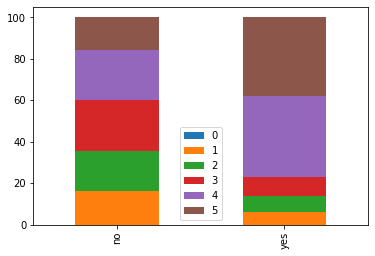

In [58]:
satis=df["satisfaction"]
num0=satis[df["seat_comfort"]==0].value_counts()
num1=satis[df["seat_comfort"]==1].value_counts()
num2=satis[df["seat_comfort"]==2].value_counts()
num3=satis[df["seat_comfort"]==3].value_counts()
num4=satis[df["seat_comfort"]==4].value_counts()
num5=satis[df["seat_comfort"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True, style="Classic")
plt.title ="Effect of Seat comfort on satisfaction"

-Most of customers who rated 4-5 are satisfied with the airline service.

In [59]:
group_data_class = df.groupby(['class']).mean().T[3:17]
group_data_class

class,Business,Eco,Eco Plus
inflight_wifi_service,2.775580,2.680796,2.775437
departure/arrival_time_convenient,2.909953,3.191385,3.208403
ease_of_online_booking,2.916008,2.603735,2.663212
gate_location,2.987273,2.968063,2.965675
food_and_drink,3.325000,3.092133,3.121030
online_boarding,3.702357,2.818814,2.899476
seat_comfort,3.746356,3.148434,3.178758
inflight_entertainment,3.631599,3.102657,3.133623
on-board_service,3.675163,3.122856,3.034325
leg_room_service,3.639630,3.083075,3.060738


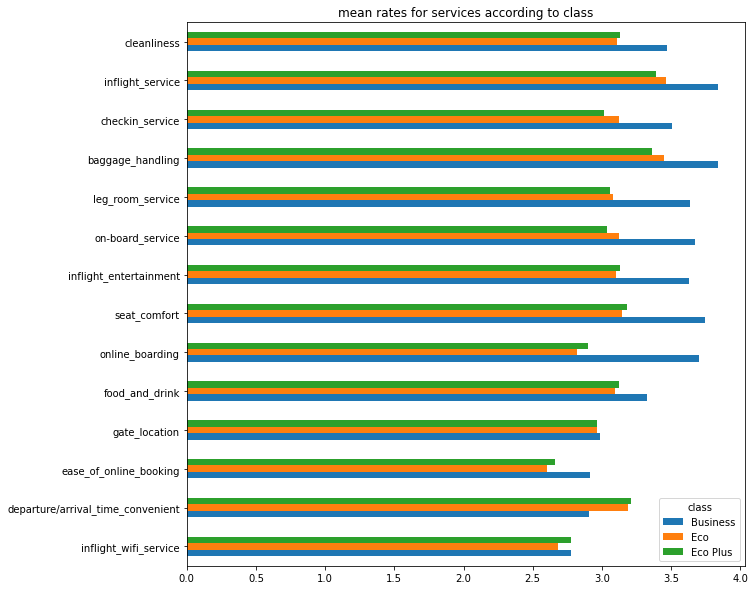

In [60]:
group_data_class.plot.barh(figsize = (10, 10), stacked = False, title = 'mean rates for services according to class')
plt.show()

In [61]:
group_data_travel = df.groupby(['type_of_travel']).mean().T[3:17]

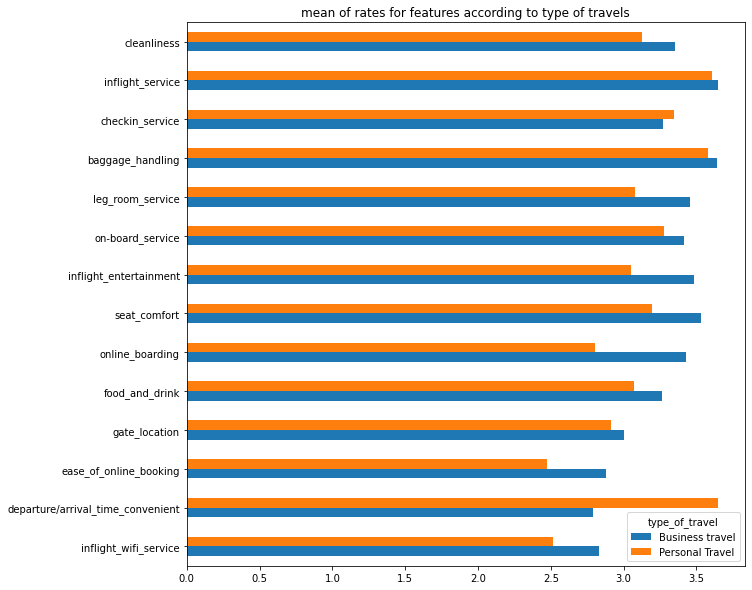

In [62]:
group_data_travel.plot.barh(figsize = (10, 10), title = 'mean of rates for features according to type of travels')
plt.show()

In [63]:
group = df.groupby(['customer_type', 'type_of_travel', 'satisfaction'])['age'].count()[:6]
group

customer_type      type_of_travel   satisfaction
Loyal Customer     Business travel  no              17773
                                    yes             41797
                   Personal Travel  no              33703
                                    yes              3762
disloyal Customer  Business travel  no              16861
                                    yes              5252
Name: age, dtype: int64

disloyal customers in personal travels are very small so we can ignore them as they will not affect the system



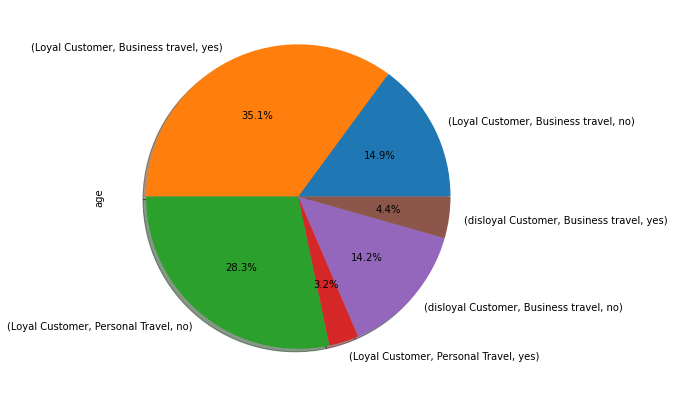

In [64]:
group.plot.pie(shadow = True , autopct = '%1.1f%%', subplots = True, figsize = (7, 7))
plt.show()

In [65]:
grouped = df.groupby(['customer_type', 'type_of_travel']).mean().T[3:17]
grouped

customer_type                      Loyal Customer                  \
type_of_travel                    Business travel Personal Travel   
inflight_wifi_service                    2.875004        2.517576   
departure/arrival_time_convenient        2.944116        3.649967   
ease_of_online_booking                   2.947474        2.474069   
gate_location                            3.007655        2.916749   
food_and_drink                           3.342521        3.070412   
online_boarding                          3.699782        2.803924   
seat_comfort                             3.729998        3.196423   
inflight_entertainment                   3.643713        3.054077   
on-board_service                         3.489088        3.274416   
leg_room_service                         3.551922        3.075991   
baggage_handling                         3.630099        3.577045   
checkin_service                          3.294074        3.346110   
inflight_service                         3.633137        3.607207   
cleanliness                              3.458452        3.124570   

customer_type                     disloyal Customer                  
type_of_travel                      Business travel Personal Travel  
inflight_wifi_service                      2.709854        2.579787  
departure/arrival_time_convenient          2.380771        3.739362  
ease_of_online_booking                     2.701488        2.489362  
gate_location                              2.996020        2.882979  
food_and_drink                             3.047212        3.069149  
online_boarding                            2.710261        2.494681  
seat_comfort                               3.005562        2.994681  
inflight_entertainment                     3.059603        3.079787  
on-board_service                           3.219283        3.356383  
leg_room_service                           3.210284        3.202128  
baggage_handling                           3.675259        3.765957  
checkin_service                            3.210781        3.313830  
inflight_service                           3.681454        3.797872  
cleanliness                                3.063130        3.090426

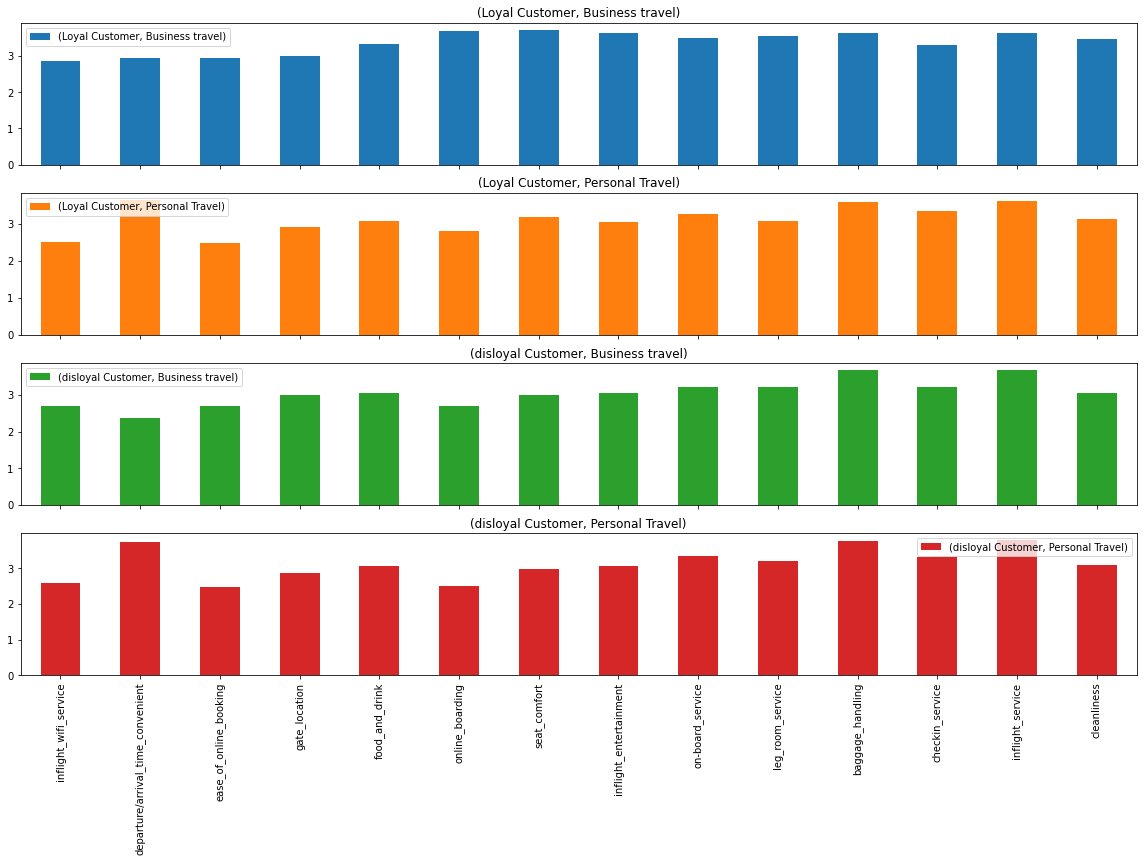

In [66]:
grouped.plot.bar(figsize = (20, 12), subplots = True)
plt.show()

# Start analysis according to type of travels

from the previous charts and plots we found that gender has no effect, flight distance is not a thing we can control and departure delay in minutes has a big relation almost the same as arrival delay in minutes so we don't need to use them in our analysis

In [67]:
b = buisness_travels = df[df['type_of_travel'] == 'Business travel'] #get the data of buisness travles on a separate container
buisness_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True) #drop unnecessary columns

In [68]:
b

,id,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,114960,Loyal Customer,55,Business travel,Business,2.0,2.0,2.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,21.0,yes
1,43337,Loyal Customer,36,Business travel,Eco,3.0,5.0,2.0,5.0,3.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,no
4,70039,Loyal Customer,39,Business travel,Eco,4.0,3.0,3.0,3.0,4.0,...,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,yes
5,119282,Loyal Customer,59,Business travel,Business,1.0,1.0,1.0,1.0,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,55.0,yes
8,9901,Loyal Customer,42,Business travel,Business,2.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122447,36253,Loyal Customer,53,Business travel,Eco,2.0,3.0,3.0,3.0,2.0,...,2.0,2.0,4.0,1.0,3.0,2.0,3.0,2.0,0.0,no
122450,72489,Loyal Customer,39,Business travel,Business,3.0,4.0,4.0,4.0,1.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,no
122451,104903,Loyal Customer,23,Business travel,Business,1.0,3.0,3.0,3.0,1.0,...,1.0,1.0,3.0,3.0,4.0,4.0,3.0,1.0,28.0,no
122452,112585,Loyal Customer,15,Business travel,Business,3.0,3.0,3.0,3.0,5.0,...,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,0.0,yes


In [69]:
p = personal_travels = df[df['type_of_travel'] == 'Personal Travel']
personal_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True)

In [70]:
p

,id,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
2,74692,Loyal Customer,17,Personal Travel,Eco,3.0,4.0,3.0,4.0,4.0,...,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,0.0,no
3,98299,Loyal Customer,11,Personal Travel,Eco,3.0,2.0,4.0,3.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,no
7,118790,Loyal Customer,35,Personal Travel,Eco,2.0,4.0,2.0,2.0,4.0,...,5.0,4.0,1.0,5.0,4.0,4.0,4.0,4.0,0.0,no
11,5308,Loyal Customer,21,Personal Travel,Eco,2.0,5.0,2.0,4.0,3.0,...,3.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,0.0,no
14,30727,Loyal Customer,43,Personal Travel,Eco,4.0,3.0,4.0,4.0,1.0,...,3.0,4.0,4.0,4.0,4.0,5.0,4.0,1.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122440,26244,Loyal Customer,39,Personal Travel,Eco,2.0,5.0,2.0,2.0,3.0,...,3.0,3.0,4.0,4.0,4.0,3.0,5.0,3.0,0.0,no
122441,63071,Loyal Customer,25,Personal Travel,Eco,1.0,4.0,1.0,3.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,5.0,0.0,no
122443,69083,Loyal Customer,52,Personal Travel,Eco,2.0,5.0,2.0,3.0,3.0,...,4.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,0.0,no
122448,50977,Loyal Customer,22,Personal Travel,Eco,1.0,5.0,1.0,3.0,2.0,...,2.0,2.0,3.0,1.0,1.0,4.0,4.0,2.0,0.0,no


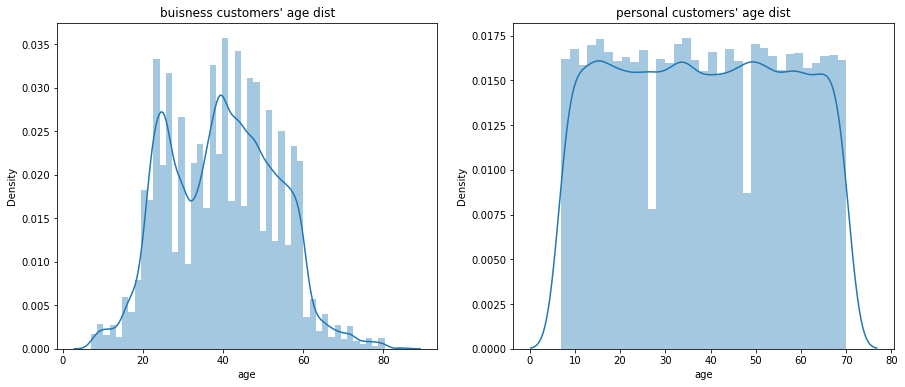

In [71]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('age_distribution')
sns.distplot(buisness_travels['age']).set_title("buisness customers' age dist")

plt.subplot(1, 2, 2)
plt.title = ('age distribution in personal travels')
sns.distplot(personal_travels['age']).set_title("personal customers' age dist")

plt.show()

we can see that the most of business travelers are between 20s and 50s so to get a high effect we need to concentrate on this age group , while in personal travels all ages from about 10 to 70 so we need to satisfy most of them in any age class so we get hight rates and higher percentage of satisfaction

In [72]:
def separate_ages(age):
    if age <= 18:
        return 'underage'
    elif 18 < age <= 30:
        return 'youth'
    elif 30 < age < 60:
        return 'adult'
    else:
        return 'old'

In [73]:
buisness_travels.age = buisness_travels.age.apply(separate_ages)
personal_travels.age = personal_travels.age.apply(separate_ages)

In [74]:
print(buisness_travels.age.value_counts())
print(personal_travels.age.value_counts())

adult       52933
youth       20747
old          4853
underage     3150
Name: age, dtype: int64
adult       17119
underage     7169
youth        6983
old          6382
Name: age, dtype: int64


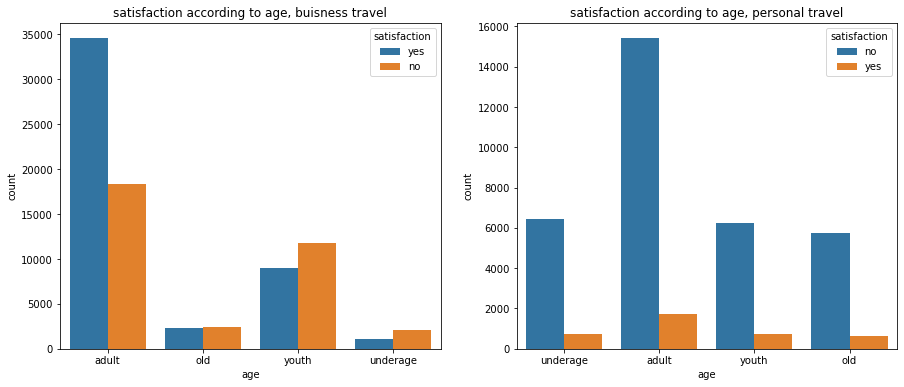

In [75]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1) 
sns.countplot(buisness_travels['age'], hue = 'satisfaction', data = buisness_travels).set_title("satisfaction according to age, buisness travel")

plt.subplot(1, 2, 2)
sns.countplot(personal_travels['age'], hue = 'satisfaction', data = personal_travels).set_title("satisfaction according to age, personal travel")

plt.show()

we can find that most satisfied group are the adults in buisness travels(30~60 years old) on the other case personal travels have no satisfaction at all

In [76]:
def get_satisfaction_rate(column):
    
    buis =  buisness_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    pers = personal_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    return buis, pers

In [77]:
def print_dist(column):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1) 
    sns.countplot(buisness_travels[column], hue = 'satisfaction', data = buisness_travels).set_title('satisfaction with {}, buisness travel'.format(column))

    plt.subplot(1, 2, 2)
    sns.countplot(personal_travels[column], hue = 'satisfaction', data = personal_travels).set_title("satisfaction with {}, personal travel".format(column))

    plt.show()

check affect of the wifi on the satisfaction

In [78]:
wifi_sat_buisness, wifi_sat_personal = get_satisfaction_rate('inflight_wifi_service')
print(wifi_sat_buisness)
print() 
print(wifi_sat_personal)

satisfaction              no    yes
inflight_wifi_service              
0.0                       10   2796
1.0                     7145   6423
2.0                    11438   7065
3.0                    11109   7147
4.0                     4801  12104
5.0                      131  11514

satisfaction                no     yes
inflight_wifi_service                 
0.0                        0.0   760.0
1.0                     6828.0     0.0
2.0                    11202.0     0.0
3.0                    11375.0     0.0
4.0                     4457.0  1534.0
5.0                        0.0  1497.0


<AxesSubplot:xlabel='inflight_wifi_service'>

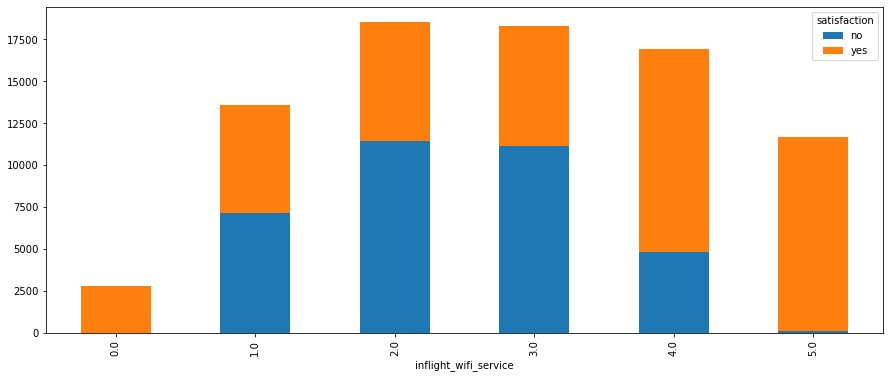

In [79]:
wifi_sat_buisness.plot(kind = 'bar', stacked = True, figsize = (15, 6))


in the above plot we can see that people can be satisfied in case there was no wifi service on the plane for all ages but in case there was any wifi service so they get un-satisfied when the wifi get worse

in conclusion: wifi is an affecting feautres in case it was available

<AxesSubplot:xlabel='inflight_wifi_service'>

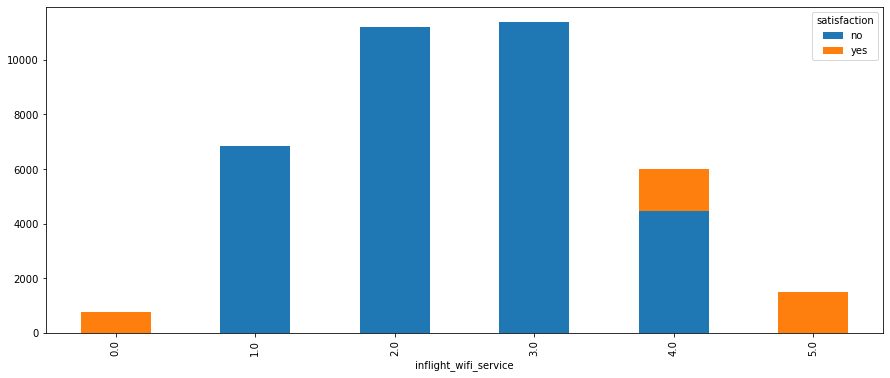

In [80]:
wifi_sat_personal.plot(kind = 'bar', stacked = True, figsize = (15, 6))

in case of personal travels we find tha that it's the same case, in case there was no wifi then people are satisfied but when the travel get a bad wifi service then the become dissatisfaction and wifi in personal travels is very bad

so to increase people satisfaction we can improve wifi service in case it was available

# affect of online booking

In [81]:
booking_sat_buisness, booking_sat_personal = get_satisfaction_rate('ease_of_online_booking')

print(booking_sat_buisness)
print(booking_sat_personal)

satisfaction              no    yes
ease_of_online_booking             
0.0                      472   2627
1.0                     6361   7396
2.0                     9026   8132
3.0                     8997   8322
4.0                     6095  10366
5.0                     3683  10206
satisfaction               no   yes
ease_of_online_booking             
0.0                      1337   820
1.0                      6274    60
2.0                     10521    38
3.0                     10597    99
4.0                      4568  1348
5.0                       565  1426


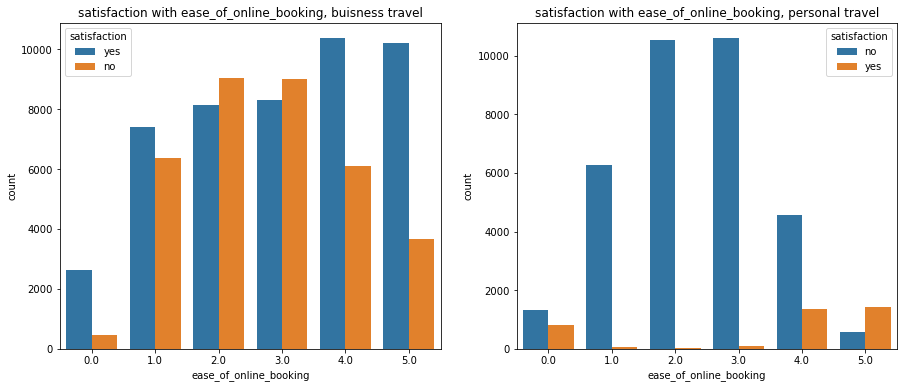

In [82]:
print_dist('ease_of_online_booking')


as shown in the above relations, in case there was no online booking there would be some dis-satisfaction but the majority is satisfied with it but in case there was a bad servie and the quality is bad then customers get dis-satisfied

so to improve buinsness travels we need to to increase quality of the online booking and make it easier for the customers while in personal travels we need to make a new system for online booknig becahse it had a realy bad rates

# affect of gate location on the satisfaction

In [83]:
gate_sat_buisness, gate_sat_personal = get_satisfaction_rate('gate_location')
gate_sat_buisness, gate_sat_personal

(satisfaction        no     yes
 gate_location                 
 0.0                0.0     1.0
 1.0             5218.0  9296.0
 2.0             6060.0  9468.0
 3.0            10023.0  9865.0
 4.0             8824.0  9753.0
 5.0             4509.0  8666.0,
 satisfaction      no   yes
 gate_location             
 1.0             5040   572
 2.0             6055   696
 3.0            11820  1317
 4.0             8504   968
 5.0             2443   238)

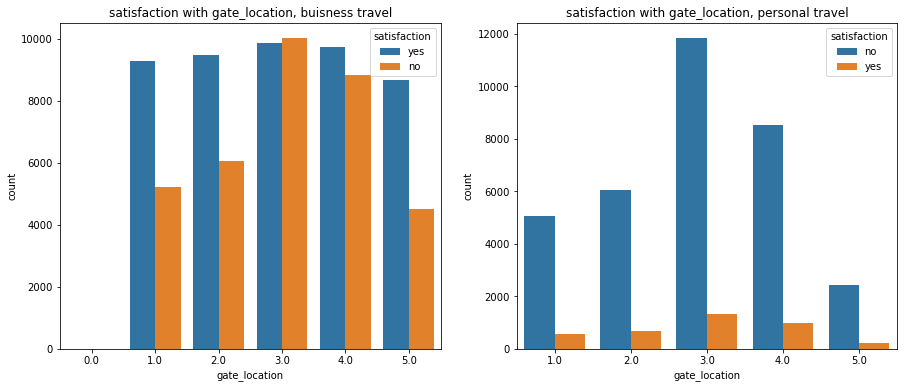

In [84]:
print_dist('gate_location')


from this location we can find that gate location doesnot affect customers satisfaction at all , as shown in buisness travels they always satisfied despite gate location rate on the other hand personal travels always dis-satisfied dispite all rates

# food and drink affect on the satisfaction

In [85]:
food_sat_buisness, food_sat_personal = get_satisfaction_rate('food_and_drink')
food_sat_buisness, food_sat_personal

(satisfaction      no    yes
 food_and_drink             
 0.0               29     33
 1.0             6541   2397
 2.0             8226   8763
 3.0             8252   9062
 4.0             6532  13729
 5.0             5054  13065,
 satisfaction      no  yes
 food_and_drink           
 0.0               44   15
 1.0             5387  590
 2.0             7356  781
 3.0             7321  769
 4.0             7026  835
 5.0             6728  801)

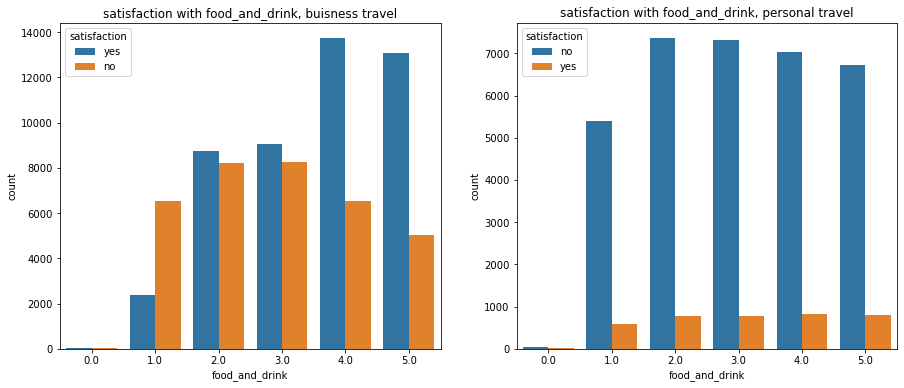

In [86]:
print_dist('food_and_drink')

as we can see from this plots the food is very affective features on the flight when it is high quality it get high rates and the customers are very satisfied on the other hand the food represented on the personal flight has alot of low rates and even the high rates has low percentage of satisfaction as the whole features represented on this type of flight is very bad

# affect of departure/arrival time convenient

In [87]:
dep_sat_buisness, dep_sat_personal = get_satisfaction_rate('departure/arrival_time_convenient')
dep_sat_buisness, dep_sat_personal

(satisfaction                         no   yes
 departure/arrival_time_convenient            
 0.0                                2368  2812
 1.0                                6295  8211
 2.0                                7846  8237
 3.0                                7680  8424
 4.0                                6200  9807
 5.0                                4245  9558,
 satisfaction                          no   yes
 departure/arrival_time_convenient             
 0.0                                  887    94
 1.0                                 2877   349
 2.0                                 3249   374
 3.0                                 3988   392
 4.0                                12008  1370
 5.0                                10853  1212)

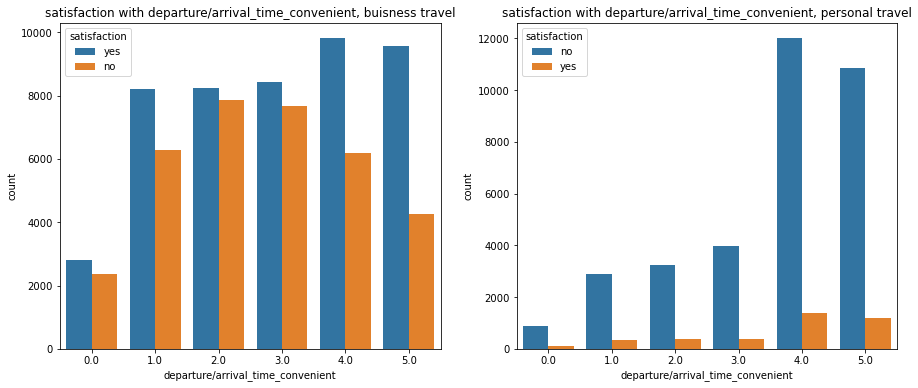

In [88]:
print_dist('departure/arrival_time_convenient')

this features has no effect as it's out of the control of the customer so no need to worry about customer satisfaction according to this feature

# affect of inflight entertainment of satisfaction

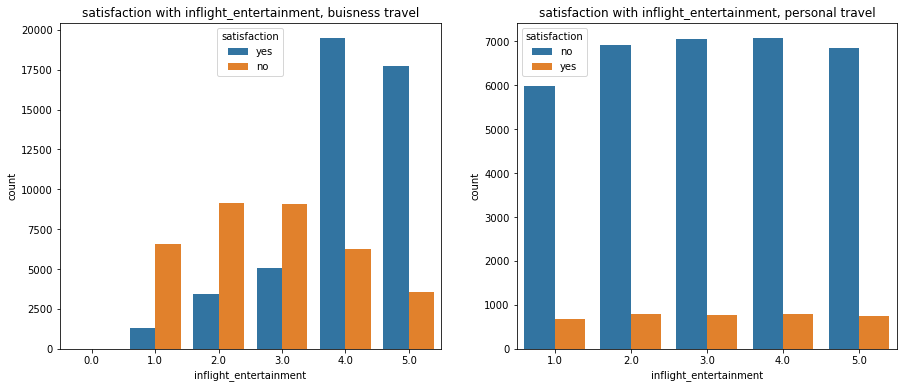

In [89]:
print_dist('inflight_entertainment')


# affect of online boarding on satisfaction


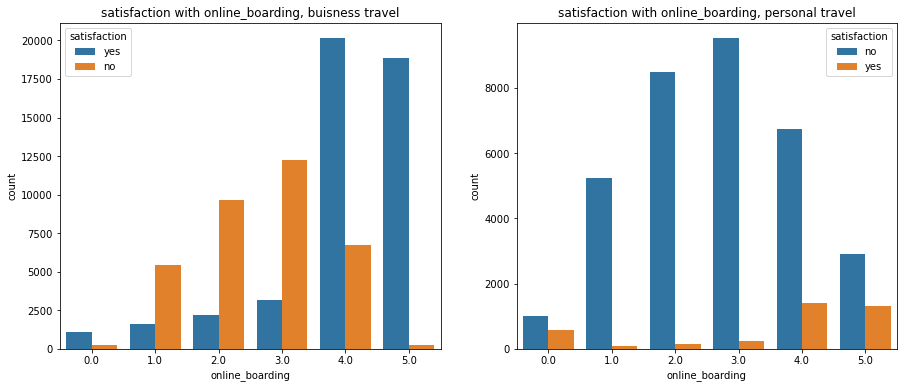

In [90]:
print_dist('online_boarding')


# affect of seat comfort on satisfaction

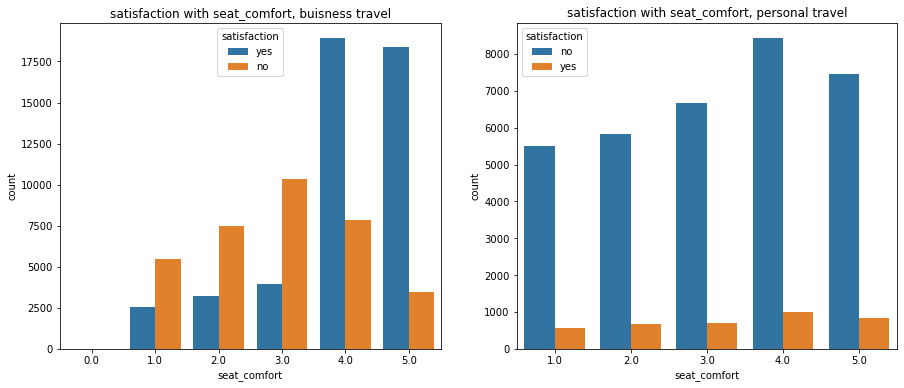

In [91]:
print_dist('seat_comfort')


# affect of on board service on satisfaction

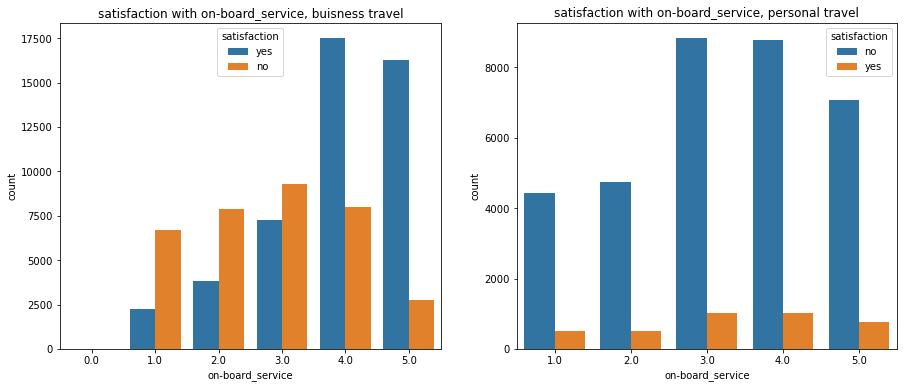

In [92]:
print_dist('on-board_service')

# relation between leg room and satisfaction

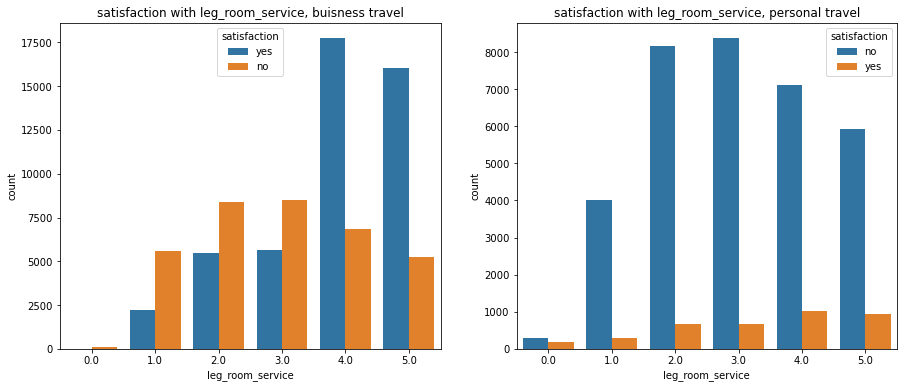

In [93]:
print_dist('leg_room_service')


relation between baggage_handling and satisfaction

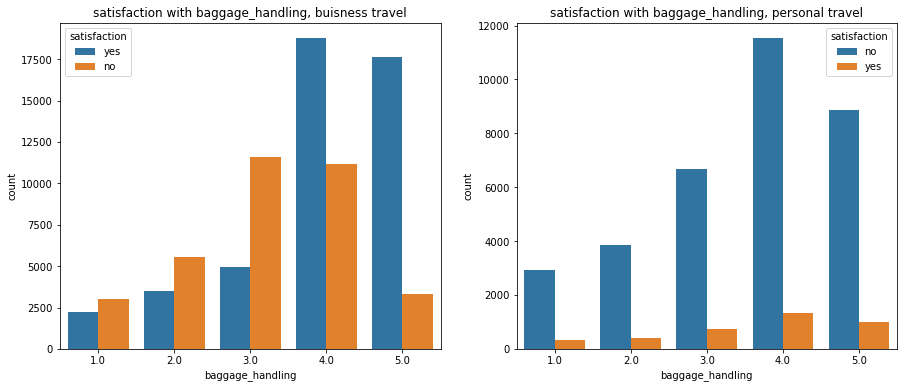

In [94]:
print_dist('baggage_handling')

# relation between checkin service and satisfaction

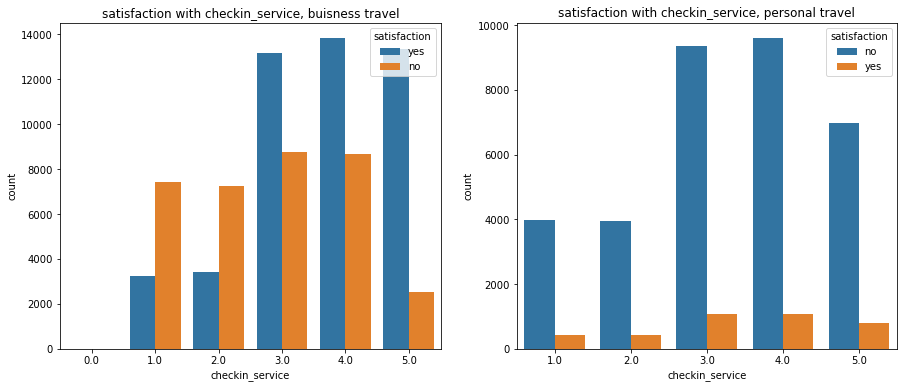

In [95]:
print_dist('checkin_service')

# relation between inflight service and satisfaction

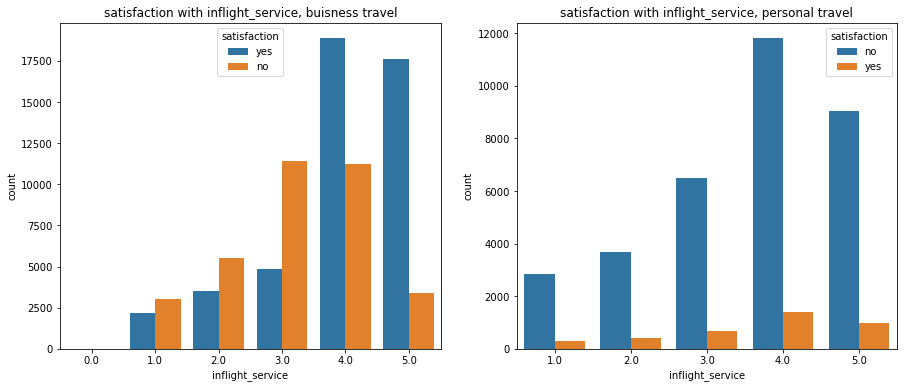

In [96]:
print_dist('inflight_service')

# relation between cleanliness and satisfaction

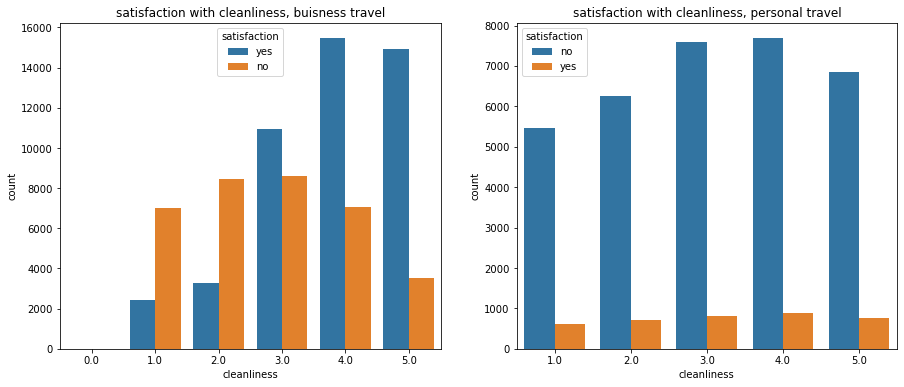

In [97]:
print_dist('cleanliness')


# check correlation

<AxesSubplot:>

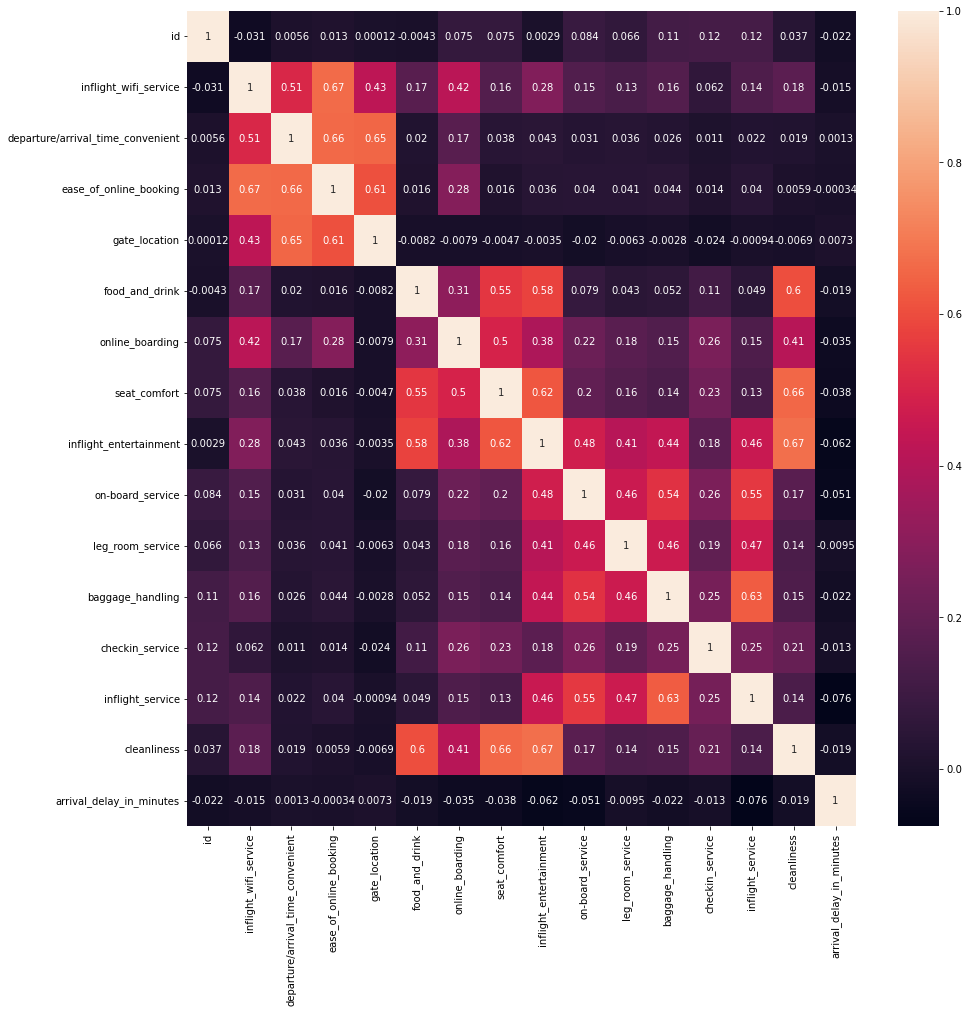

In [98]:
plt.figure(figsize = (15,15))
sns.heatmap(buisness_travels.corr(), annot = True)

from the above heatmap we can find that there is a powerful relation between some services like

1- cleanliness with food and drink, seat comfort and inflight entertainment

2- inflight service with on board service and baggage handling

3- inflight wifi services with ease of online booking

4- online boarding with seat comfort

5- gate location with ease of online booking and departure/arrival time convenient

<AxesSubplot:xlabel='inflight_wifi_service', ylabel='ease_of_online_booking'>

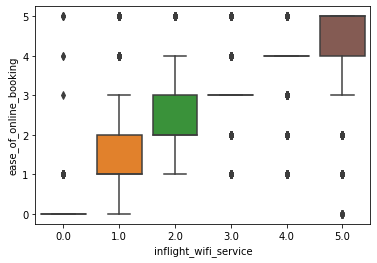

In [99]:
sns.boxplot(x = 'inflight_wifi_service', y = 'ease_of_online_booking', data = buisness_travels)

from this plot we can find that the companies that support online booknig in easy way have a good in inflight wifi whcih mean more satisfaction in the flight

<AxesSubplot:xlabel='inflight_wifi_service', ylabel='ease_of_online_booking'>

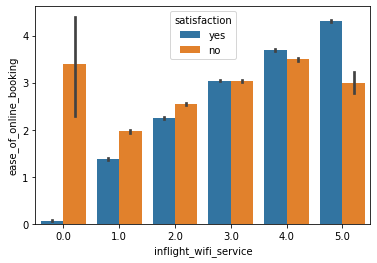

In [100]:
sns.barplot(x='inflight_wifi_service', y='ease_of_online_booking', hue = 'satisfaction', data = buisness_travels)

form here we can see that providing a good inflight wifi service to the customers is more important than providing an easy way to book online

<AxesSubplot:xlabel='ease_of_online_booking', ylabel='departure/arrival_time_convenient'>

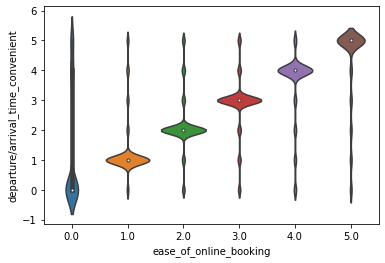

In [101]:
sns.violinplot(x = 'ease_of_online_booking', y = 'departure/arrival_time_convenient', data = buisness_travels)

as we can see there is a linear relation between ease of online booking and departure and arrival time as online booking offers a good way to choose the suitable time for each customer

<AxesSubplot:xlabel='cleanliness', ylabel='food_and_drink'>

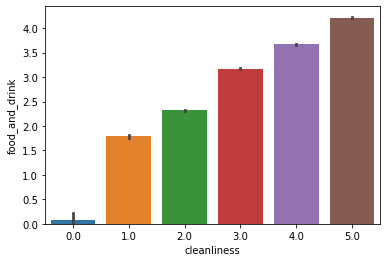

In [102]:
sns.barplot(x = 'cleanliness', y = 'food_and_drink', data = buisness_travels)


there is a big relation between cleanliness and food and drink as shown in the above data, so

In [103]:
from sklearn.decomposition import PCA

remove unnecessary columns after analysis

In [104]:
df_3 = df.drop(['gender', 'departure_delay_in_minutes', 'gate_location'], axis = 1)
df_3

,id,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,food_and_drink,...,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,114960,Loyal Customer,55,Business travel,Business,2001,2.0,2.0,2.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,21.0,yes
1,43337,Loyal Customer,36,Business travel,Eco,387,3.0,5.0,2.0,3.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,no
2,74692,Loyal Customer,17,Personal Travel,Eco,1235,3.0,4.0,3.0,4.0,...,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,0.0,no
3,98299,Loyal Customer,11,Personal Travel,Eco,1072,3.0,2.0,4.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,no
4,70039,Loyal Customer,39,Business travel,Eco,183,4.0,3.0,3.0,4.0,...,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122449,3154,Loyal Customer,63,Personal Travel,Eco,140,5.0,3.0,5.0,5.0,...,5.0,5.0,4.0,5.0,2.0,2.0,5.0,5.0,0.0,yes
122450,72489,Loyal Customer,39,Business travel,Business,1704,3.0,4.0,4.0,1.0,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,no
122451,104903,Loyal Customer,23,Business travel,Business,1565,1.0,3.0,3.0,1.0,...,1.0,1.0,3.0,3.0,4.0,4.0,3.0,1.0,28.0,no
122452,112585,Loyal Customer,15,Business travel,Business,602,3.0,3.0,3.0,5.0,...,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,0.0,yes


from the previous chars and plots we found that gender has no effect, flight distance is not a thing we cna control and departure delay in minutes has a big relation almost the same as arrival delay in minutes so we don't need to use them in our analysis

   # encoding

In [105]:
categorical = ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']


In [106]:
# Categorical to numerical in train set
for column in categorical:
    numerical = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, numerical], axis=1)
    df.drop(column, inplace=True, axis=1)

df.head()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,yes
0,114960,55,2001,2.0,2.0,2.0,2.0,4.0,4.0,4.0,...,4.0,3.0,24.0,21.0,0,0,0,0,0,1
1,43337,36,387,3.0,5.0,2.0,5.0,3.0,3.0,3.0,...,1.0,3.0,0.0,1.0,1,0,0,1,0,0
2,74692,17,1235,3.0,4.0,3.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,0.0,0,0,1,1,0,0
3,98299,11,1072,3.0,2.0,4.0,3.0,1.0,4.0,1.0,...,4.0,1.0,0.0,0.0,0,0,1,1,0,0
4,70039,39,183,4.0,3.0,3.0,3.0,4.0,4.0,4.0,...,4.0,4.0,0.0,0.0,1,0,0,1,0,1


Conclusion

We can conclude that the data is quite balanced and do not require any special treatment or resampling.

gender: The satisfied vs dissatisfied ratio in both genders is the same. So, this feature should be ignored as it does not contribute to the overall satisfaction level.

gate location:- This feature does not affect the satisfaction level in both types of travel. So, this feature is to be ignored.

inflight entertainment:- As shown, a change in the satisfaction level causes a huge rise in the number of satisfied people in the Business type of travel

seat comfort:- The number of satisfied people in business level substantially increases by increasing the satisfaction level of seat comfort.

online boarding :- As shown below, the higher the satisfaction level, the bigger is the number of satisfied customers.

baggage handling:- Any increase in the satisfaction level of baggage handling service is accompanied by a substantial increase in the number of satisfied customers.

onboard service:- A change in rating has an enormous effect on the number of satisfied customer in the business travel.

online booking:- The number of satisfied people slightly increases by changing the satisfaction level.